# Exploratory Data Analysis - Investigating Drivers of Diabetes Progression

#### A Python-based portfolio project analyzing a public health dataset.

#### By Lisa Monozlai

-----------------------------------------------------------------------------------------------------------------------------------------------

## Table of Contents

- [Introduction](#Introduction)
- [Data Variables](#Data-Variables)
- [Data Cleaning](#Data-Cleaning)
- [Missing Data](#Missing-Data)
- [Analysis](#Analysis)
   - [Progression Distribution](#Progression-Distribution)
   - [Progression by Sex and Age](#Progression-by-Sex-and-Age)
   - [Progression by Health Indicators](#Progression-by-Health-Indicators)
- [Key Findings](#Key-Findings)

-----------------------------------------------------------------------------------------------------------------------------------------------

# Introduction

This exploratory data analysis (EDA) examines how demographic and health variables relate to diabetes progression, using a 2004 dataset (`diabetes.csv`) from the [University of Copenhagen](https://www4.stat.ncsu.edu/%7Eboos/var.select/diabetes.html). The dataset includes: 

- 442 individuals,
- 2 demographic variables,
- 8 health variables,
- and a score representing diabetes progression one year later.

The goal of this analysis is to identify patterns and key indicators that may help inform early monitoring and preventive strategies for diabetes. A snapshot of the dataset can be found below.

In [1]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head().round(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018,151.0
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092,75.0
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026,141.0
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009,206.0
4,0.005,-0.045,-0.036,0.022,0.004,0.016,0.008,-0.003,-0.032,-0.047,135.0


[Back to Top](#Table-of-Contents)

-----------------------------------------------------------------------------------------------------------------------------------------------

# Data Variables

The dataset includes demographic characteristics and clinical health indicators commonly used in diabetes research. All predictor variables are numerically standardized, with the exception of `Progression`, which represents the outcome measure.

**Demographic variables**

age — Age in years.

sex — Biological sex (male or female).

**Body metrics**

bmi — Body mass index, an indicator of body fat and metabolic risk.

bp — Average blood pressure, related to heart and metabolic health.

**Cholesterol and lipid measures**

s1 — Total cholesterol.

s2 — Low-density lipoprotein (LDL, “bad” cholesterol).

s3 — High-density lipoprotein (HDL, “good” cholesterol).

s4 — Total cholesterol-to-HDL ratio.

s5 — Triglycerides, often linked to insulin resistance.

**Blood glucose**

s6 — Baseline blood glucose level.

**Outcome variable**

Progression — Diabetes progression one year after baseline, used to assess how initial health measures relate to disease change over time.

[Back to Top](#Table-of-Contents)

-----------------------------------------------------------------------------------------------------------------------------------------------

# Data Cleaning

Before analysis, the dataset was evaluated for common data quality issues to ensure results would be accurate and interpretable. The following checks were performed:

In [2]:
# Check for missing values

df.isnull().sum()

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64

In [3]:
# Check data types

df.dtypes

age            float64
sex            float64
bmi            float64
bp             float64
s1             float64
s2             float64
s3             float64
s4             float64
s5             float64
s6             float64
Progression    float64
dtype: object

In [4]:
# Check for duplicate rows

df.duplicated().sum()

np.int64(0)

In [5]:
# View all variable names

df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'Progression'],
      dtype='object')

In [6]:
# Summary statistics to spot unusual values

df.describe().round(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


These checks confirmed that:

- all variables are correctly typed,
- there are no duplicate records, and
- values fall within expected ranges.

No structural or formatting issues were identified, so no cleaning steps were necessary.

[Back to Top](#Table-of-Contents)

-----------------------------------------------------------------------------------------------------------------------------------------------

# Missing Data

Missing values were assessed separately to determine whether imputation or record exclusion would be necessary.

In [7]:
# Check for missing values

df.isnull().sum()

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64

No missing values were found for any variables. The full dataset was therefore retained for analysis, with no imputation needed.

-----------------------------------------------------------------------------------------------------------------------------------------------

[Back to Top](#Table-of-Contents)

# Analysis

This exploratory analysis focuses on the question: **Which health indicators are most strongly associated with faster diabetes progression over one year?**

To answer this, the analysis examines:

- how diabetes progression scores are distributed across the population,
- differences in progression by sex and age, and
- associations between progression and key health indicators.

## Progression Distribution

Understanding the overall distribution provides context by showing whether progression is generally low, moderate, or high, and whether extreme values are present. 

A `histogram` is used to assess the shape and variability of progression scores.

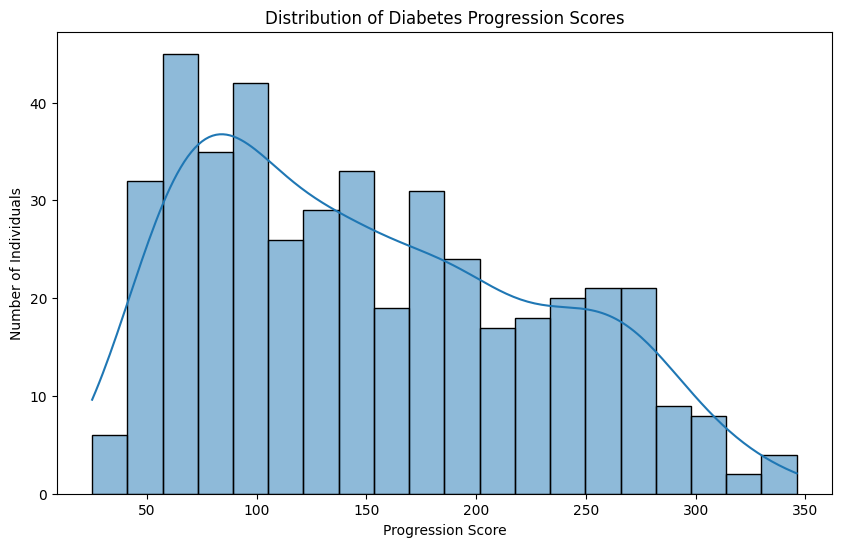

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(
    df["Progression"], 
    bins=20, 
    kde=True
)
plt.title("Distribution of Diabetes Progression Scores")
plt.xlabel("Progression Score")
plt.ylabel("Number of Individuals")

plt.show()

#### Key Observations

- Diabetes progression scores vary widely, from approximately 25 to 346.
- The distribution is moderately right-skewed, meaning a smaller subset of individuals experienced higher progression scores over the one-year period.

[Back to Top](#Table-of-Contents)

-----------------------------------------------------------------------------------------------------------------------------------------------

## Progression by Sex and Age

Demographic patterns can highlight groups that may benefit from earlier screening or targeted intervention.

A `grouped bar chart` displays average diabetes progression across sex and age categories. 

Age was categorized into five groups (Youngest, Younger, Middle, Older, Oldest), and sex is represented as Male or Female.

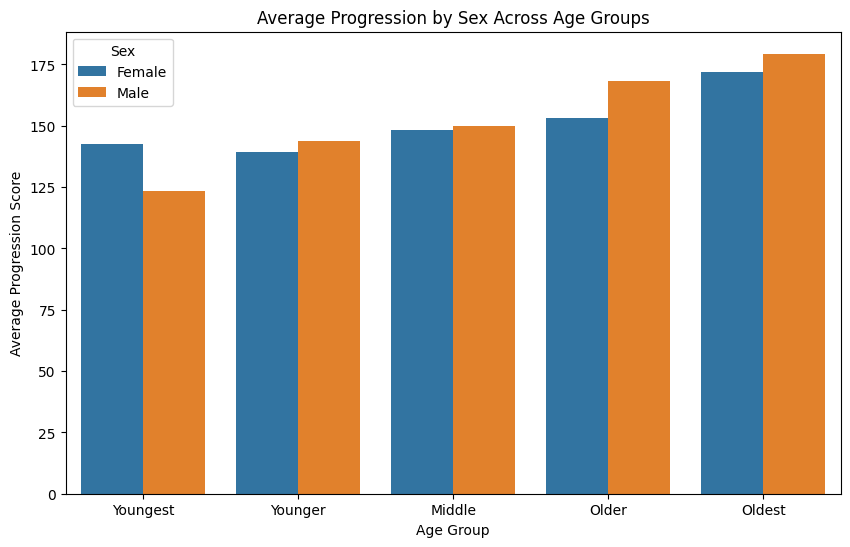

In [9]:
df["age_category"] = pd.qcut(
    df["age"], 
    q=5, 
    labels=["Youngest", "Younger", "Middle", "Older", "Oldest"]
)

df["sex_category"] = df["sex"].map(
    {
        df["sex"].min(): "Female", 
        df["sex"].max(): "Male"
    }
)

grouped = (
    df.groupby(
    ["sex_category", "age_category"], 
    observed=True
    )["Progression"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped, 
    x="age_category", 
    y="Progression", 
    hue="sex_category")
plt.title("Average Progression by Sex Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Average Progression Score")
plt.legend(title="Sex")

plt.show()

In [10]:
# Get exact progression averages to support analysis

df.groupby('age_category', observed=True)['Progression'].mean().round()

age_category
Youngest    135.0
Younger     141.0
Middle      149.0
Older       163.0
Oldest      176.0
Name: Progression, dtype: float64

In [11]:
df.groupby('sex_category')['Progression'].mean().round()

sex_category
Female    149.0
Male      156.0
Name: Progression, dtype: float64

#### Key Observations

- Men have slightly higher average progression scores than women.
- Progression increases steadily with age.
- Differences are noticeable but modest compared with the full range of scores (25–346).

[Back to Top](#Table-of-Contents)

-----------------------------------------------------------------------------------------------------------------------------------------------

## Progression by Health Indicators 

To identify which clinical health measures are most strongly associated with diabetes progression, relationships between progression scores and key indicators were examined. These include BMI, blood pressure, cholesterol measures, triglycerides, and blood sugar. Age was also included for demographic context.

`Scatterplots` with trend lines show the patterns visually, while `regression slopes` quantify the strength of each predictor’s association with progression.

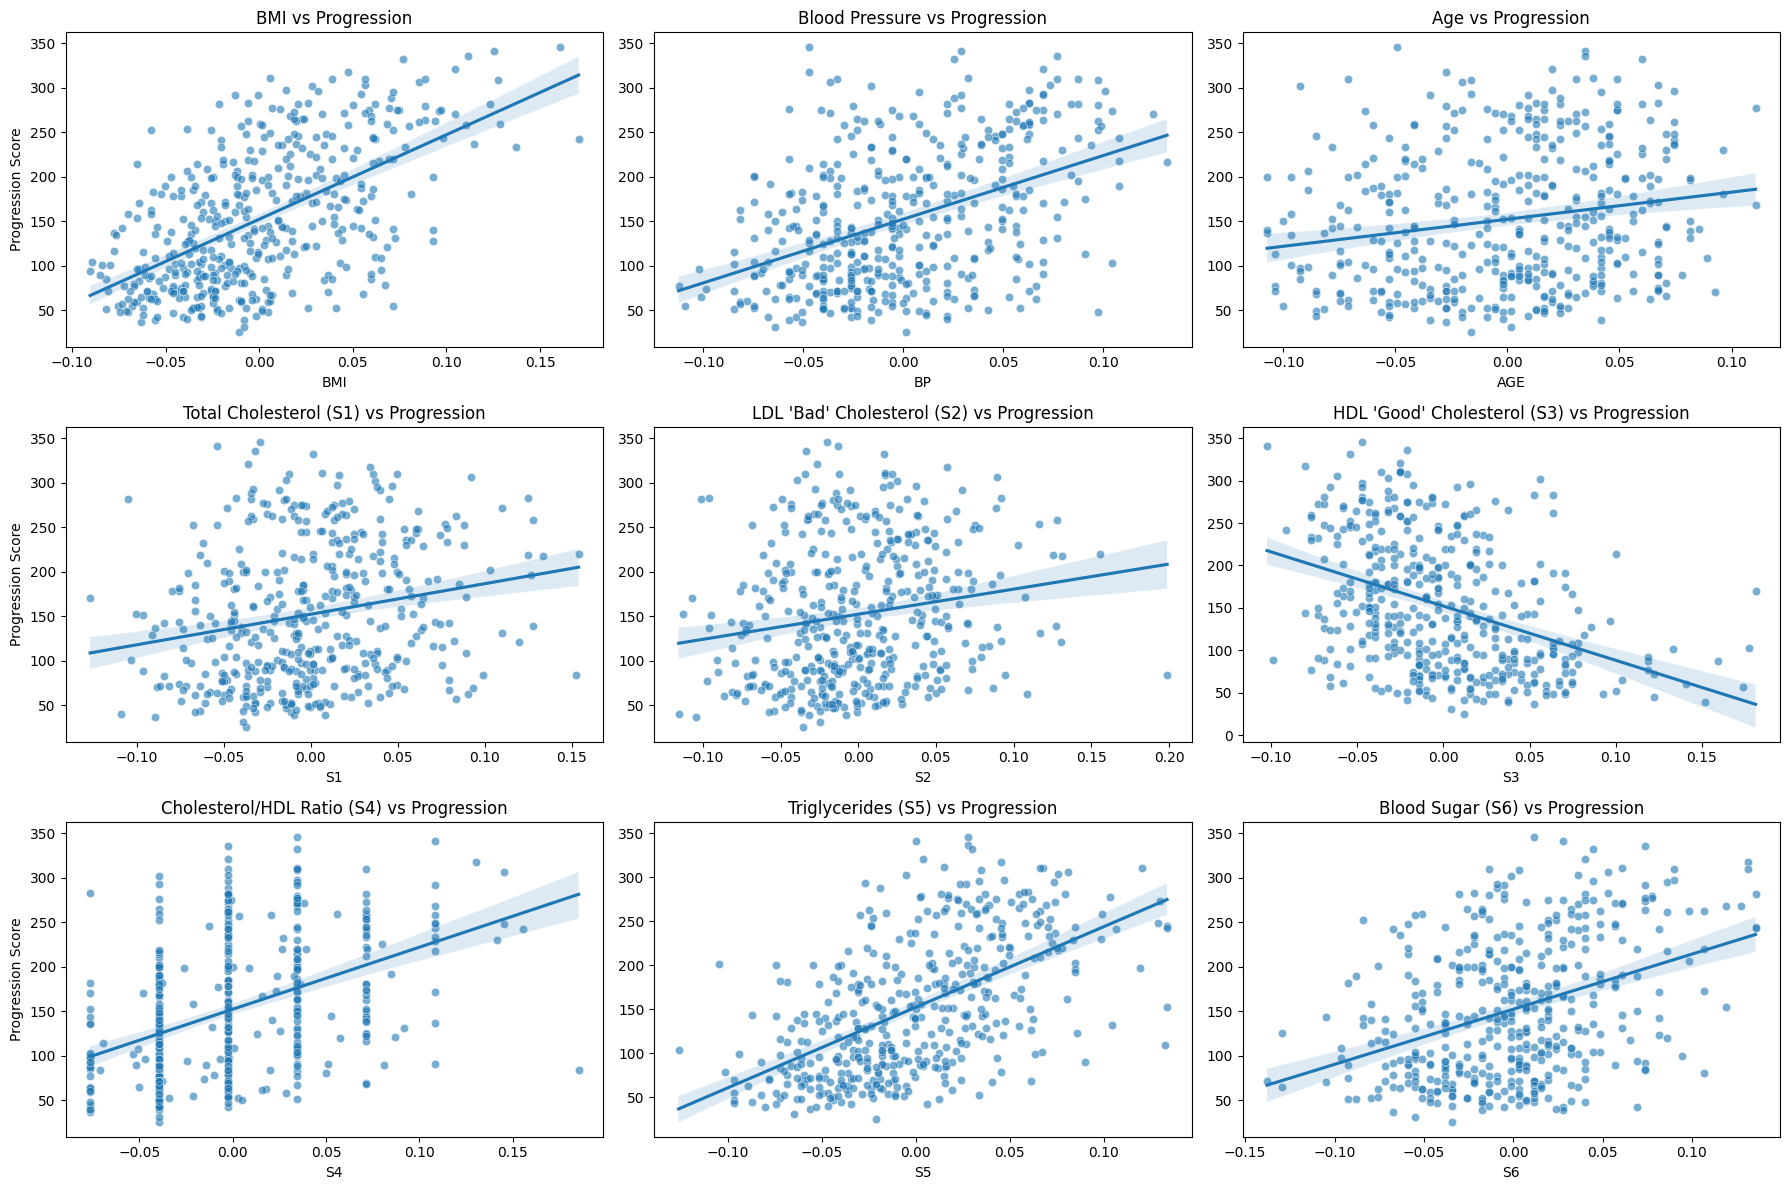

In [12]:
# Scatterplots with regression lines

fig, axes = plt.subplots(3, 3, figsize=(18, 12))

metrics = ["bmi", "bp", "age", "s1", "s2", "s3", "s4", "s5", "s6"]

titles = [
    "BMI vs Progression", 
    "Blood Pressure vs Progression", 
    "Age vs Progression", 
    "Total Cholesterol (S1) vs Progression",
    "LDL 'Bad' Cholesterol (S2) vs Progression",
    "HDL 'Good' Cholesterol (S3) vs Progression",
    "Cholesterol/HDL Ratio (S4) vs Progression",
    "Triglycerides (S5) vs Progression",
    "Blood Sugar (S6) vs Progression"
]

axes = axes.flatten()

for i, (ax, metric, title) in enumerate(zip(axes, metrics, titles)):
    sns.scatterplot(
        data=df, 
        x=metric, 
        y="Progression", 
        ax=ax, 
        alpha=0.6
    )
    sns.regplot(
        data=df, 
        x=metric, 
        y="Progression", 
        scatter=False, 
        ax=ax
    )
    
    ax.set_title(title)
    ax.set_xlabel(metric.upper())
    
# Only label the y-axis on the left column
    
    if i % 3 == 0:
        ax.set_ylabel("Progression Score")
    else:
        ax.set_ylabel("")

plt.tight_layout()
plt.show()

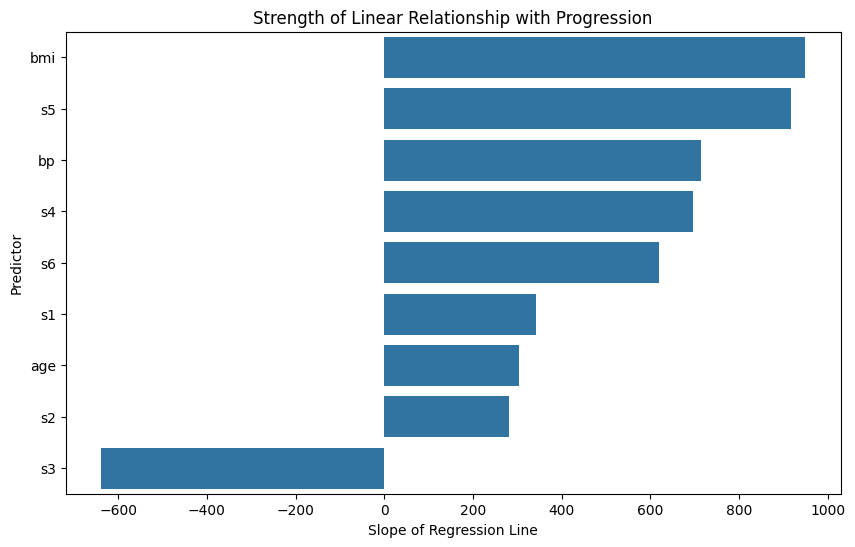

In [13]:
# Compute regression slopes

from scipy.stats import linregress

metrics = ["bmi", "bp", "age", "s1", "s2", "s3", "s4", "s5", "s6"]
slopes = {}

for m in metrics:
    slope = linregress(df[m], df["Progression"])[0]
    slopes[m] = slope

# Visualize regression slopes 

slope_df = pd.DataFrame(
    {
        "metric": slopes.keys(), 
        "slope": slopes.values()
    }
).sort_values(
    "slope", ascending=False
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=slope_df, 
    x="slope", 
    y="metric")
plt.title("Strength of Linear Relationship with Progression")
plt.xlabel("Slope of Regression Line")
plt.ylabel("Predictor")

plt.show()

In [14]:
# Get exact regression slope values to support analysis

print(slope_df)

  metric       slope
0    bmi  949.435260
7     s5  916.137375
1     bp  714.738259
6     s4  696.883030
8     s6  619.222821
3     s1  343.254452
2    age  304.183075
4     s2  281.784593
5     s3 -639.145279


#### Key Observations

- BMI has the strongest positive association with diabetes progression. 
- Triglycerides (S5) has the second strongest association.
- Blood pressure (BP), cholesterol/HDL ratio (S4), and  blood sugar (S6) show moderate positive associations.
- Total cholesterol (S1), age, and LDL cholesterol (S2) show weak positive associations.
- HDL cholesterol (S3) is negatively associated with progression, suggesting a protective effect.

[Back to Top](#Table-of-Contents)

-----------------------------------------------------------------------------------------------------------------------------------------------

# Key Findings

This analysis shows that metabolic health measures are the strongest factors linked to diabetes progression. **BMI** and **triglycerides** stand out as the biggest drivers, suggesting that higher body mass and higher triglyceride levels are linked to faster disease progression. Blood pressure, cholesterol ratios, and blood sugar have smaller effects, while HDL cholesterol appears protective.

Demographic factors are less influential. Men had slightly higher progression scores than women, and progression increased gradually with age, but these differences are modest compared with the overall variation in the data. 

These findings align with broader research: higher BMI is a known risk factor for type 2 diabetes, with long-term studies showing that people with increasing BMI are more likely to develop diabetes ([Nature, 2024](https://www.nature.com/articles/s41598-024-75179-6)). Elevated triglycerides are linked to insulin resistance and metabolic dysfunction, which contribute to faster progression ([BMC Public Health, 2025](https://pubmed.ncbi.nlm.nih.gov/40165126/)), ([IJMS, 2025](https://www.mdpi.com/1422-0067/26/20/9910)).

**Overall, monitoring BMI and triglycerides can help identify people at higher risk and guide interventions to slow disease progression**.

[Back to Top](#Table-of-Contents)